In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simple Bayes Classifier

In [55]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleBayesClassifier:
    def __init__(self, x=np.linspace(-7, 11, 50000),prior = {"w1": 0.75, "w2": 0.25},dist={"w1": (4,2), "w2": (0,2)}):  # Extended range for better visualization
        self.x = x  # Range of x values
        self.class_tag = {"happy cat": "w1", "sad cat": "w2"}
        self.prior = prior
        self.dist = dist
        self.evidence = self.likelihood(x, "w1") * self.prior["w1"] + \
                        self.likelihood(x, "w2") * self.prior["w2"]
    
    def pdf(self, z, mean=0, var=1, dist_type="gaussian"):
        """Calculate Gaussian PDF for given mean, variance, and z values."""
        if dist_type == "gaussian":
            sd = np.sqrt(var)  # Standard deviation
            pdf = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((z - mean) ** 2) / var)
        return pdf
    
    def likelihood(self, x, w="w1"):
        """Likelihood function for w1 (happy) or w2 (sad)."""
        return self.pdf(x, mean=self.dist[w][0], var=self.dist[w][1])  # Class w1: mean=4, variance=2
        
    def posterior(self, x, w="w1"):
        """Calculate the posterior probability P(w|x) for a given class."""
        likelihood = self.likelihood(x, w)
        posterior = (likelihood * self.prior[w]) / self.evidence
        return posterior
    
    def likelihood_ratio_test(self):
        """Find decision boundaries where likelihood ratio for w1 vs w2 equals 1."""
        likelihood_w1 = self.likelihood(self.x, w="w1")
        likelihood_w2 = self.likelihood(self.x, w="w2")
        likelihood_ratio = (likelihood_w1 * self.prior["w1"]) / (likelihood_w2 * self.prior["w2"])
        
        # Compute the difference from 1 to detect crossings
        diff = likelihood_ratio - 1

        # Find where the sign of diff changes
        crossing_indices = np.where(np.diff(np.sign(diff)))[0]
        
        # Return x values at crossing points
        decision_boundaries = self.x[crossing_indices]
        return decision_boundaries

    def plot_likelihood(self):
        """Plot the likelihoods P(x|w1) and P(x|w2) with decision boundaries."""
        likelihood_w1 = self.likelihood(self.x, w="w1")
        likelihood_w2 = self.likelihood(self.x, w="w2")
        decision_boundaries = self.likelihood_ratio_test()  # Get decision boundaries

        plt.figure(figsize=(3, 2))
        plt.plot(self.x, likelihood_w1, label="P(x|w1): Happy Cat", color="blue", linewidth=2)
        plt.plot(self.x, likelihood_w2, label="P(x|w2): Sad Cat", color="red", linestyle="--", linewidth=2)

        # Plot decision boundaries as vertical black lines
        for boundary in decision_boundaries:
            plt.axvline(boundary, color="black", linestyle=":", linewidth=1, label="Decision Boundary")

        plt.title("Likelihood of Food Amount")
        plt.xlabel("x (Amount of Food)")
        plt.ylabel("Likelihood (P(x|w))")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_posterior(self):
        """Plot the posterior probabilities P(w1|x) and P(w2|x) with decision boundaries."""
        posterior_w1 = self.posterior(self.x, w="w1")
        posterior_w2 = self.posterior(self.x, w="w2")
        decision_boundaries = self.likelihood_ratio_test()  # Get decision boundaries

        plt.figure(figsize=(3, 2))
        plt.plot(self.x, posterior_w1, label="P(w1|x): Happy Cat", color="blue", linewidth=2)
        plt.plot(self.x, posterior_w2, label="P(w2|x): Sad Cat", color="red", linestyle="--", linewidth=2)

        # Plot decision boundaries as vertical black lines
        for boundary in decision_boundaries:
            plt.axvline(boundary, color="black", linestyle=":", linewidth=1, label="Decision Boundary")

        plt.title("Posterior Probabilities")
        plt.xlabel("x (Amount of Food)")
        plt.ylabel("Posterior Probability P(w|x)")
        plt.legend()
        plt.grid(True)
        plt.show()



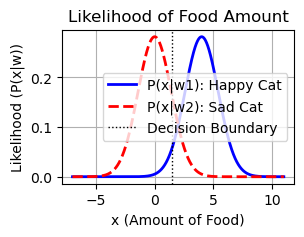

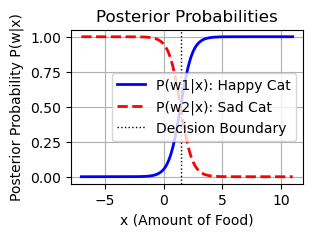

Decision Boundary Points: [1.45044901]


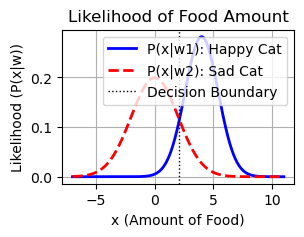

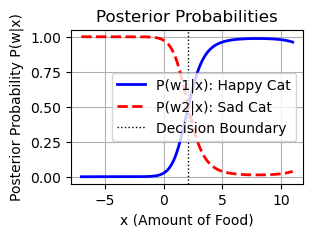

Decision Boundary Points: [2.10314206]


In [57]:
# Instantiate the classifier
classifier = SimpleBayesClassifier()

classifier.plot_likelihood()
classifier.plot_posterior()
decision_boundary = classifier.likelihood_ratio_test()
print("Decision Boundary Points:", decision_boundary)

# Instantiate the classifier
classifier2 = SimpleBayesClassifier(prior = {"w1": 0.5, "w2": 0.5},dist={"w1": (4,2), "w2": (0,4)})  # Extended range for better visualization)

classifier2.plot_likelihood()
classifier2.plot_posterior()
decision_boundary2 = classifier2.likelihood_ratio_test()
print("Decision Boundary Points:", decision_boundary2)

# Employee Attrition Prediction



### read CSV

In [ ]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [ ]:
df.describe()

In [ ]:
df.head()

### Feature transformation

In [ ]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE

# HANDLE NULL NUMBERS
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test =

### Display histogram of each feature

In [ ]:
def display_histogram(df, col_name, cls, n_bin = 40):
    
    # INSERT CODE HERE

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

### T9. What is the prior distribution of the two classes?

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [ ]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [ ]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [ ]:
x_train = 
y_train = 

x_test = 
y_test = 

In [ ]:
model = SimpleBayesClassifier(n_pos = , n_neg = )

In [ ]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) ==
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) ==
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) ==
    
check_prior()

In [ ]:
model.fit_params(x_train, y_train)

In [ ]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

In [ ]:
y_pred = model.predict(x = x_test)

In [ ]:
def evaluate(y_true, y_pred, show_result = True):

  return accuracy, precision, recall, F1, fpr

In [ ]:
evaluate(y_test, y_pred)

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [ ]:
model.fit_gaussian_params(x_train, y_train)

In [ ]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

In [ ]:
y_pred = model.gaussian_predict(x_test)

In [ ]:
evaluate(y_test, y_pred)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



### T15. Compare the two baselines with your Naive Bayes classifier.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


### T17. Plot the RoC of your classifier.

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.
